

<h1 style="text-align: left; color:Indian_red; padding: 10px; border: 5px solid Indian_red;"> 
    T.P. n°2
    <span style="float:right;"> Diffusion thermique - corrigé  </span>
</h1>


# 1. Échauffement d'une barre en contact avec une source chaude

On s'intéresse ici à une barre métallique cylindrique dont la surface latérale est calorifugée. L'extrémité droite de la barre est en contact, supposé parfait, avec l'air de température $T_d = 20°C$. Avant le début de l'expérience, toute la barre est à l'équilibre thermique à la température $T_d$. 

À l'instant initial, on place l'extrémité gauche de la barre (origine des abscisses) en contact d'une source de chaleur de température $T_g=40°C$. Ce contact est supposé parfait.

*L'objectif de cette partie est de déterminer l'évolution de la température au sein de la barre au cours du temps.*


## 1.1. Étude théorique

On appelle désormais $L=0,5$m la longueur de la barre.

>**Question**   
> Faire un schéma de la situation (on appellera $(Ox)$ l'axe dirigeant la barre) et établir l'équation aux dérivées partielles vérifiées par la température dans la barre. Au bout de combien de temps, en ordre de grandeur, peut-on considérer que le régime permanent est atteint au sein de la barre ? Déterminer alors le champ de température en régime permanent dans la barre.

>**Réponse**  
cf. cours (équation de la chaleur) : 
$$\frac{\partial T}{\partial t} = D_{\rm th} \frac{\partial^2 T}{\partial x^2}$$
La durée du régime transitoire a pour ordre de grandeur : $\tau = \dfrac{L^2}{D_{\rm th}}$.   
Le champ de température vaut alors : 
$$T(x) = T_g + \dfrac{T_d-T_g}{L}x $$

 


## 1.2. Etude numérique

### 1.2.1. Modélisation

Nous allons dans la suite déterminer la température $T(x,t)$ :
* en tout point de la barre
* à tout instant de l'expérience considérée.

Pour cela, nous allons découper la barre en tronçons de longueur $dx=1cm$.
L'étude sera menée sur une durée de $\Delta t = 45min$, avec un pas temporel de $dt=0.01s$.

La fonction $T(x,t)$ sera donc approximée par un tableau ```T[i,j]``` de telle sorte que :
$T[i,j]\simeq T(x=j\times dx,t=i\times dt)$.

Autrement dit, chaque ligne du tableau correspond à un instant de l'expérience (la ligne ```i=0``` correspondant à l'instant initial). Au sein d'une ligne, on parcourt la barre de gauche (```j=0```) à droite en incrémentant ```j```.

Le tableau utilisé est de type ```numpy.array```. On aura de plus besoin du module ```matplotlib.pyplot``` pour effectuer les représentations graphiques du champ de température.

Les modules suivants seront utiles dans la suite de l'étude

In [1]:
import numpy as np
import matplotlib.pyplot as pl
# à décommenter pour avoir des affichages interactifs
# %matplotlib widget

### 1.2.2. Initialisation

On nommera désormais les variables entières ```Nt``` et ```Nx``` correspondant respectivement au nombre de lignes du tableau ```T``` et au nombre de colonnes.

>**Question**
>
>Définir ```Nx``` et ```Nt``` sur Python et créer le tableau ```T``` de bonnes dimensions, rempli pour le moment avec des 0 dans chaque case. Créer également les listes ```x``` et ```t``` correspondant respectivement aux valeurs de $x$ pour laquelle la température est évaluée, ainsi qu'aux instants $t$ de calcul.

In [2]:
dx=1e-2
dt=1e-2

L=0.5
Deltat=45*60

Nx=int(L/dx)+1
Nt=int(Deltat/dt)+1

x=[j*dx for j in range(Nx)]
t=[i*dt for i in range(Nt)]

T=np.zeros((Nt,Nx))

>**Question**
>
>Remplir la première ligne du tableau ```T``` pour spécifier les conditions initiales de l'expérience.

In [3]:
Tg=40 #NB : on peut travailler indifférence en °C ou K (on le verra avec le schéma numérique)
Td=20

T[0,0]=Tg
for j in range(1,Nx):
    T[0,j]=Td

# version alternative utilisant le slicing sur les ndarray
T[0,1:Nx]=Td

T

array([[40., 20., 20., ..., 20., 20., 20.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], shape=(270001, 51))

>**Question**
>
>Tracer le profil de température au sein de la barre à l'instant initial.

Text(0.5, 1.0, 'Champ de température initial')

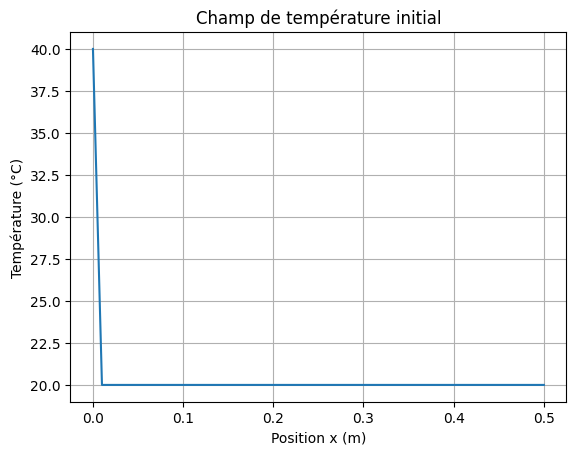

In [4]:
pl.plot(x,T[0,:])
pl.grid()
pl.xlabel("Position x (m)")
pl.ylabel("Température (°C)")
pl.title("Champ de température initial")

### 1.2.3. Itérations

>**Question**
>
> Remplir le tableau ```T``` de manière à imposer, à tout instant, les conditions aux limites aux deux extrémités de la barre.

In [5]:
for i in range (1,Nt): # l'instant initial a déjà été traité
    T[i,0]=Tg
    T[i,-1]=Td

# ou de même avec le slicing
T[1:Nt,0],T[1:Nt,-1]=Tg,Td


Il s'agit donc désormais de résoudre l'équation :
$$\frac{\partial T}{\partial t} = D \frac{\partial^2 T}{\partial x^2}$$

>**Question**   
> En utilisant l'approximation de la dérivée, proposer une évaluation de $\left(\frac{\partial T}{\partial t}\right)_{j}$.

>**Réponse**  

$$\left(\frac{\partial T}{\partial t}\right)_{j} \simeq \frac{T[i+1,j]-T[i,j]}{dt}$$

>**Question**   
> Soit une fonction $f$ de classe $\mathscr{C}^2$. 
En raisonnant de même, proposer une évaluation de $f''(x_0)$.

>**Réponse**  
>  En écrivant la formule de Taylor à l’ordre 2 pour $f(x+dx)$ et $f(x-dx)$ et en les sommant, on trouve : 
$$ f''(x_0)\simeq\frac{f(x_0+dx)+f(x_0-dx)-2f(x_0)}{dx^2}$$

>**Question**
>
> En déduire une approximation de $\left(\frac{\partial^2 T}{\partial x^2}\right)_{i}$ en fonction de `T[i,j]` et de la température de cases voisines du tableau.

>**Réponse**  
$$\left(\frac{\partial^2 T}{\partial x^2}\right)_{i} \simeq \frac{T[i,j+1]+T[i,j-1]-2T[i,j]}{dx^2}$$

> **Question**
> En déduire le schéma numérique auquel se ramène la résolution de l'équation de diffusion thermique.

>**Réponse**  
On injecte dans l'équation de la chaleur les deux approximations réalisées
$$ T[i+1,j]=T[i,j]+\frac{D dt}{dx^2} \left( T[i,j+1]+T[i,j-1]-2T[i,j]\right)$$


On peut montrer qu'un tel schéma numérique converge si $2D dt<dx^2$. Avec les valeurs de $dx$ et de $dt$ choisies, cette condition est respectée pour un matériau de coefficient de diffusivité thermique usuelle $D=1.10^{-4} m^2.s^{-1}$. On adoptera donc cette valeur de $D$ pour la suite.

>**Question**
>
> Implémenter ce schéma numérique pour réaliser le remplissage du tableau ```T``` dans son intégralité.

In [6]:
D=1e-4

for i in range(0,Nt-1): #on remplit à l'indice i+1
    for j in range(1,Nx-1): #les conditions aux limites sont déjà fixées
        T[i+1,j]=T[i,j]+D*dt/(dx*dx)*(T[i,j+1]+T[i,j-1]-2*T[i,j])

>**Question**
>
> A l'aide de la fonction ```pl.imshow```, visualiser le tableau ```T``` et commenter. On pourra utiliser l'argument ```aspect="auto"``` pour obtenir une image lisible.

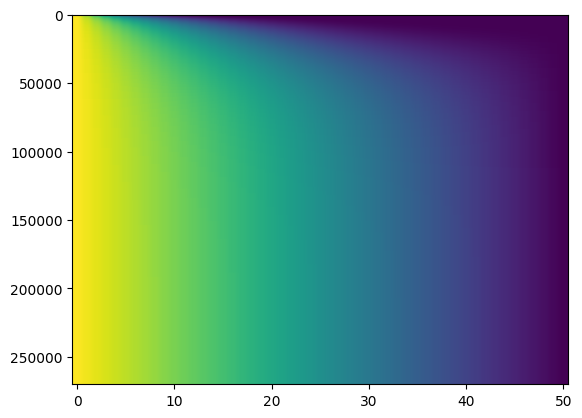

In [7]:
pl.imshow(T,aspect="auto")

>**Question**
>
>Pour différents instants bien choisis, tracer sur un même graphique l'évolution de la température au sein de la barre. Quand est atteint le régime permanent ? Commenter.

Text(0.201, 38, 'tau=L²/D=41min')

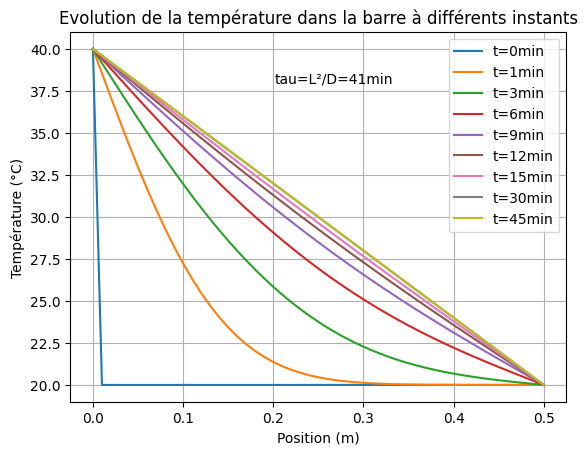

In [8]:
instants_min=[0,1,3,6,9,12,15,30,45] #instants choisis en minutes


for k in range(len(instants_min)):
    i=int(instants_min[k]*60/dt)
    pl.plot(x,T[i,:],label="t="+str(instants_min[k])+"min")
pl.xlabel("Position (m)")
pl.ylabel("Température (°C)")
pl.title("Evolution de la température dans la barre à différents instants")
pl.legend()
pl.grid()

tau_min=L*L/D*1/60

pl.text(0.201,38,"tau=L²/D="+str(tau_min)[0:2]+"min")

## 1.3. Pour aller plus loin

### 1.3.1. Puissance volumique interne dans tout le conducteur

>**Question**
>
>En s'inspirant de l'étude précédente, simuler la montée en température d'un barreau métallique calorifugé, de résistance $R$, maintenu à une température égale à ses deux extrémités, et parcouru par un courant électrique $I$. 
>
>*On prendra ici des valeurs arbitraires pour R et I*.

>**Réponse**  
L'équation à résoudre est désormais :
$$ \frac{\partial T}{\partial t} = D \frac{\partial^2 T}{\partial x^2} + K$$ avec $K=\frac{p_V}{\rho c}$.
>
>$p_V=\frac{RI^2}{SL}$ est la puissance volumique dissipée par effet Joule ($S$ étant la section du barreau), $\rho$ la masse volumique du barreau et $c$ la capacité thermique massique du barreau.
>
>Le schéma numérique associé à cette équation devient alors :
$$ T[i+1,j]=T[i,j]+dt\times \left(\frac{D}{dx^2} ( T[i,j+1]+T[i,j-1]-2T[i,j]) + K\right)  $$


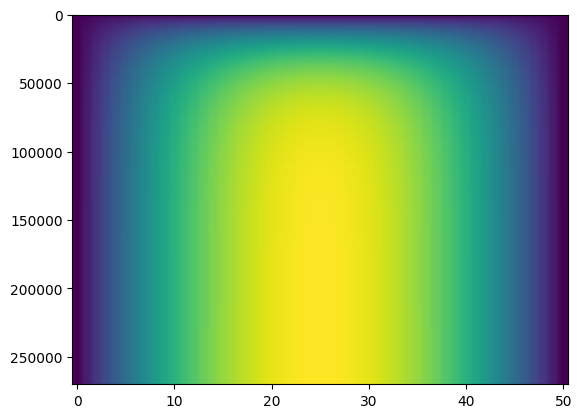

In [9]:
dx=1e-2
dt=1e-2

L=0.5
Deltat=45*60

Nx=int(L/dx)+1
Nt=int(Deltat/dt)+1

x=[j*dx for j in range(Nx)]
t=[i*dt for i in range(Nt)]

T=np.zeros((Nt,Nx))

Tlim=20

#initialisation

T[0,0]=Tlim
for j in range(1,Nx):
    T[0,j]=Tlim
    
#instants ultérieurs

for i in range (1,Nt): # l'instant initial a déjà été traité
    T[i,0]=Tlim
    T[i,-1]=Tlim
    
K=1 #K est choisie arbitrairement de manière à avoir des résultats graphiques adaptés.
D=1e-4

for i in range(0,Nt-1): #on remplit à l'indice i+1
    for j in range(1,Nx-1): #les conditions aux limites sont déjà fixées
        T[i+1,j]=T[i,j]+dt*(D/(dx*dx)*(T[i,j+1]+T[i,j-1]-2*T[i,j])+K) 
        

pl.imshow(T,aspect="auto")

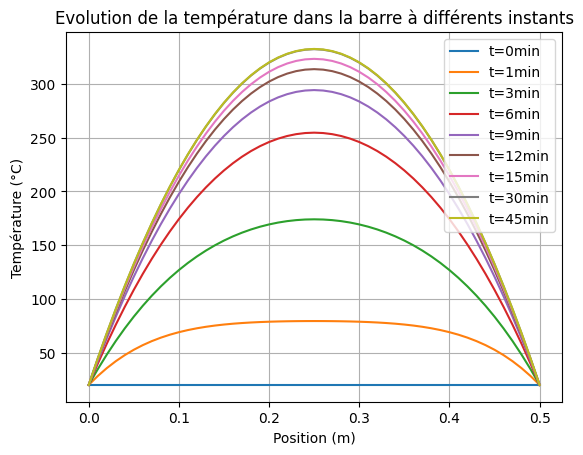

In [10]:
instants_min=[0,1,3,6,9,12,15,30,45] #instants choisis en minutes

pl.close()
pl.figure()
for k in range(len(instants_min)):
    i=int(instants_min[k]*60/dt)
    pl.plot(x,T[i,:],label="t="+str(instants_min[k])+"min")
pl.xlabel("Position (m)")
pl.ylabel("Température (°C)")
pl.title("Evolution de la température dans la barre à différents instants")
pl.legend()
pl.grid()

pl.show()

# 2. Évolution de la température dans une pièce

Cette deuxième partie, tirée d'un problème de concours, met en œuvre la
même méthode dans un problème à deux dimensions.

On considère une pièce carrée dont les murs sont maintenus à une
température constante de 20°C. Cette pièce dispose
d'une fenêtre et d'une porte qui sont moins bien isolées que les murs et
qui présentent une température de 10°C.\
Un radiateur permet de fournir l'énergie nécessaire pour compenser les
pertes thermiques. Ce radiateur est à une température égale à
60°C.\
On souhaite déterminer la température en un point quelconque de cette
pièce une fois le régime stationnaire établi.

En l'absence de convection, la température $T(x,y,t)$ à l'instant $t$ et
en un point $M(x,y)$ vérifie l'équation de la chaleur :
$$\frac{\partial T}{\partial t} = \frac{\lambda}{\rho c} \Delta T$$ 
où
$\lambda$ est la conductivité thermique de l'air, $\rho$ sa masse
volumique, $c$ sa capacité thermique.

>**Question**
Simplifier l'équation de la chaleur en supposant le régime permanent
atteint et le problème à deux dimensions.

>**Réponse**   
En utilisant l'expression du laplacien en coordonnées cartésiennes, l'équation devient : 
$$\left( \frac{\partial T}{\partial y}\right)_{M_0} + \left( \frac{\partial^2 T}{\partial y^2}\right)_{M_0} = 0$$

## 2.1.  Résolution approchée et discrétisation du problème

On réalise un maillage de la pièce. On note $h$ le pas de la grille
c'est-à-dire la distance entre deux nœuds voisins. À chaque nœud, on
pourra relever la température. On note $T_i$ la température au point
$M_i$. On écrit alors les développements limités autour du point $M_0$ :

$$\begin{aligned}
T_1 = T_0  + h\left( \frac{\partial T}{\partial y}\right)_{M_0 } + \frac{h^2}{2}\left( \frac{\partial^2 T}{\partial y^2}\right)_{M_0 } + o(h^2)\\
T_2 = T_0  + h\left( \frac{\partial T}{\partial x}\right)_{M_0 } + \frac{h^2}{2}\left( \frac{\partial^2 T}{\partial x^2}\right)_{M_0 } + o(h^2)\\
T_3 = T_0  - h\left( \frac{\partial T}{\partial y}\right)_{M_0 } + \frac{h^2}{2}\left( \frac{\partial^2 T}{\partial y^2}\right)_{M_0 } + o(h^2)\\
T_4 = T_0  - h\left( \frac{\partial T}{\partial x}\right)_{M_0 } + \frac{h^2}{2}\left( \frac{\partial^2 T}{\partial x^2}\right)_{M_0 } + o(h^2)\end{aligned}$$

>**Question**   
Montrer qu'en régime stationnaire,
$$T_0  = \frac{1}{4}\left(T_1 + T_2 + T_3 + T_4\right) + o(h^2).$$

>**Réponse**   
Il suffit de sommer les quatre équations données dans l'énoncé ce qui donne la réponse à la question posée.

## 2.2.  Mise sous forme matricielle

On représente la pièce par une matrice carrée ${11 \times 11}$. On
appelle $P_0$ la matrice de maillage en début de résolution en
initialisant les températures inconnues à 0.

>**Question**   
Écrire une fonction `init` qui retourne cette matrice $P_0$ sous forme
d'une matrice `numpy` (on ne rentrera pas tous les coefficients à la
main !). Attention, `T[0,0]` correspond à la température du coin en haut
à gauche. Utiliser la fonction `imshow` du module `pyplot` de matplotlib
pour afficher $P_0$. Cette fonction prend une matrice en argument et
trace le profil des valeurs en modifiant la couleur de chaque point
selon la valeur prise. On peut ajouter une barre de légende avec la
fonction `colorbar()`

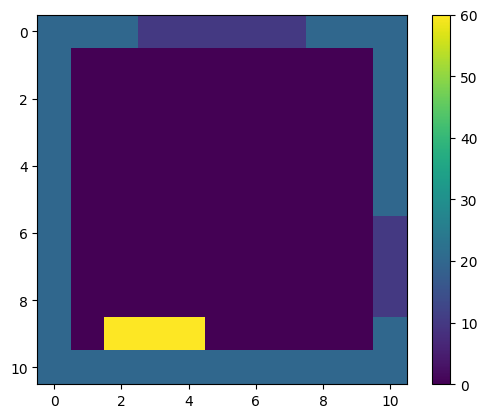

In [11]:
def init():
    # renvoie la matrice P0
    P = np.zeros((11,11)) # quatre parenthèses
    # les murs
    P[0,:]=20.
    P[:,0]=20.
    P[-1,:]=20.
    P[:,-1]=20.
    # le radiateur
    P[-2,2:5]=60.
    # la fenêtre et la porte
    P[6:9,-1] = 10.
    P[0,3:8] = 10.
    return P

# Affichage de P0
P0 = init()
pl.imshow(P0)
pl.cm.Reds_r
pl.colorbar()
pl.show()

## 2.3.  Résolution et critère de convergence

La température en chaque point $M_0$ doit être ajustée en fonction des
températures $T_i$ des 4 points voisins. Seules les températures des
murs, de la porte, de la fenêtre et du radiateur n'évoluent pas.\
Pour obtenir la température atteinte en régime permanent, nous allons
appliquer un processus itératif :

-   Première itération : Pour chaque point de la pièce (hors murs,
    porte, fenêtre et radiateur) la température du point $M$ à
    l'itération suivante est égale à la moyenne des température des
    quatre points voisins à l'itération courante. Les modifications de
    températures sont importantes. Seuls les points proches des murs
    prennent des valeurs différentes de 0. On obtient la liste $P_1$

-   Deuxième itération : à partir de la liste de température $P_1$, on
    recommence en appliquant à nouveau le même processus. La liste
    présente de moins en moins de 0.

-   ...on recommence ainsi jusqu'à ce qu'en chaque point, la température
    semble converger vers une valeur finale.

>**Question**   
Écrire une fonction `suivante(P)` qui renvoie un nouveau tableau. On
pourra utiliser la méthode `copy` pour copier une liste.---
Calculer $P_1$, l'afficher. En profiter pour détecter d'éventuelles erreurs.
Calculer $P_2$, l'afficher.   

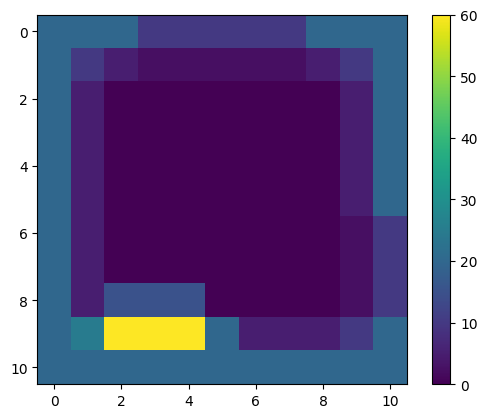

In [12]:
def suivante(P):
    # renvoie un nouveau tableau
    # P n'est pas modifié
    Psuiv = P.copy() # ne surtout pas oublier les parenthèses !
    n_li,n_co = P.shape
    # utilise l'équation de la chaleur sauf sur les bords
    # (noter les bornes des fonctions range)
    for i in range(1,n_li-1):
        for j in range(1,n_co-1):
            Psuiv[i,j] =   P[i-1,j]+P[i+1,j]+P[i,j-1]+P[i,j+1]
            Psuiv[i,j] /= 4
    # rétablit la température du radiateur
    Psuiv[-2,2:5] = 60
    return Psuiv

# Affichage de P1
P1 = suivante(P0)
pl.imshow(P1)
pl.colorbar()


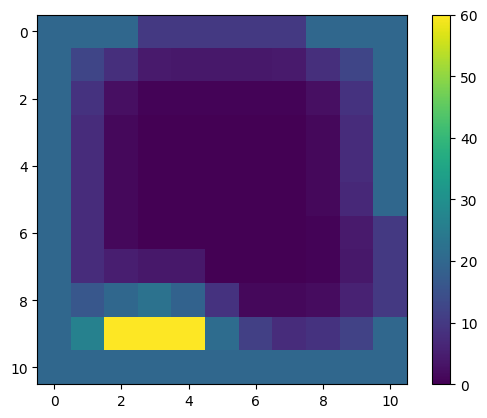

In [13]:
# Affichage de P2
P2 = suivante(P1)
pl.imshow(P2)
pl.colorbar()

On supposera le régime permanent atteint quand d'une itération à la
suivante, la modification des températures sera négligeable. On
utilisera comme critère quantitatif une norme matricielle. On imposera
une erreur inférieure à $\varepsilon = 10^{-5}$ :
$$\left\| P_{k+1} - P_k \right\| <\varepsilon$$

On peut définir plusieurs normes matricielles, nous utiliserons la
définition suivante : $$\left\|A\right\| = 
\max_{0\leq i, j < n} \left| a_{i j} \right|$$

>**Question**   
Proposer un script permettant d'obtenir une matrice contenant la
température en chaque point de la pièce en régime permanent.

>**Réponse**   
On commence par définir une fonction qui retourne la norme d'une matrice P selon les données de l'énoncé.

In [14]:
def norme(P):
    # en entrée : une matrice n * p avec n>0 et p>0
    # en sortie : sa norme infinie (un flottant)
    maxi = abs(P[0,0])
    n_li,n_co = P.shape
    for i in range(n_li):
        for j in range(n_co):
            if abs(P[i,j]) > maxi:
                maxi = abs(P[i,j])
    return maxi
    #return abs(P).max() est interdit
    #return abs(P.max()) est faux

>Une boucle while permet d'obtenir le résultat recherché.

In [15]:
P = init()
Psuiv = P.copy()
eps = 1e-5
erreur = 1 + eps # erreur > eps pour rentrer dans la boucle
while erreur > eps:
    P,Psuiv = Psuiv,suivante(Psuiv)
    erreur = norme(P - Psuiv)
# en sortie de boucle Psuiv vérifie la condition imposée


## 2.4.  Affichage des résultats

Deux graphes seront affichés : le premier permettant d'avoir une image
de la température en tout point de la pièce, le deuxième permettant de
tracer les courbes isothermes.

>**Question**   
En utilisant la commande dédiée à l'affichage d'images `imshow`,
afficher une image de la température régnant dans la pièce en régime
permanent.\
On souhaite ensuite créer un graphe faisant apparaître les lignes de
niveau.

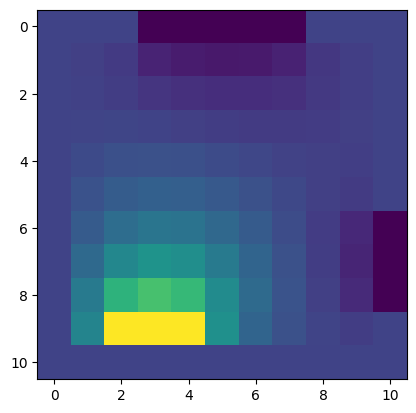

In [16]:
# Affichage de la solution obtenue à la question précédente
pl.imshow(Psuiv)

La représentation graphique de la température dans la pièce est une
fonction de deux variables x et y, les coordonnées d'espace. Il faut
donc commencer par créer un maillage bidimensionnel permettant de
stocker tous les couples $(x,y)$. La fonction `meshgrid` de la
bibliothèque Numpy permet de réaliser cette opération. Elle prend en
argument 2 listes comprenant les valeurs de $x$ et de $y$ :\

    x,y=np.linspace(0,10,11),np.linspace(0,10,11)  
    X,Y=pl.meshgrid (x,y)            # maillage

Pour tracer l'évolution de la matrice température en lignes de niveau,
deux fonctions sont adaptées, appelées respectivement `contour` et
`contourf`. La première ne trace que les lignes de niveau alors que la
seconde colore le graphe entre ces lignes de niveau. Ces deux fonctions
prennent en argument $X$, $Y$ ainsi que la liste de température. Il est
possible de spécifier le nombre de niveaux en 4e argument.\

>**Question**   
Tracer en utilisant les fonctions décrites ci-dessus les lignes de
niveau de la température. On pourra optimiser l'affichage pour qu'il
corresponde à la géométrie de la pièce (radiateur en bas à gauche\...).

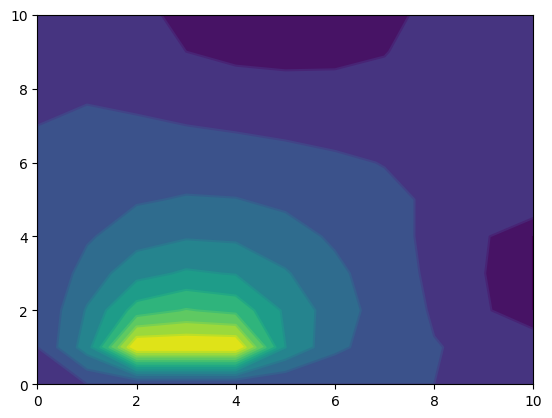

In [17]:
# Construction des lignes de niveau
x,y = np.arange(11),np.arange(11)
pl.figure()
X,Y = np.meshgrid(x,y)
P = Psuiv[::-1,:] # pour mettre l'image à l'endroit
pl.contour(X,Y,P,10)
pl.contourf(X,Y,P,10)